
This project focuses on utilizing machine learning algorithms for hydrocarbon exploration in the oil and gas industry. The project aims to address the industry's need for innovative solutions due to the continuity and high complexity of the technological chain, from geological exploration to product delivery. By leveraging machine learning, particularly for forecasting the development of new profitable fields, this project seeks to enhance the efficiency and accuracy of locating oil and gas deposits both onshore and offshore.

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

In [4]:
df1 = pd.read_csv('oil_test.csv', header = 0)
df1

,Field name,Reservoir unit,Country,Region,Basin name,Tectonic regime,Latitude,Longitude,Operator company,Hydrocarbon type,Reservoir status,Structural setting,Depth,Reservoir period,Lithology,Thickness (gross average ft),Thickness (net pay average ft),Porosity,Permeability
0,ABU GHARADIG,BAHARIYA,EGYPT,AFRICA,ABU GHARADIG,EXTENSION,29.7422,28.4925,GUPCO,GAS-CONDENSATE,MATURE PRODUCTION,RIFT,10282,CRETACEOUS,SANDSTONE,745.0,144.0,10.0,8.0
1,ABU MADI-EL QARA,ABU MADI (LEVEL III),EGYPT,AFRICA,NILE DELTA,STRIKE-SLIP/TRANSTENSION/SHALE/EVAPORITE/BASEM...,31.4382,31.3616,IEOC,GAS,DECLINING PRODUCTION,WRENCH/DELTA,10499,NEOGENE,SANDSTONE,509.0,410.0,20.0,300.0
2,ALIBEKMOLA,KT I,KAZAKHSTAN,FORMER SOVIET UNION,CASPIAN NORTH,COMPRESSION/EVAPORITE,48.4740,57.6667,KAZAKHOIL AKTOBE,OIL,DEVELOPING,SUB-SALT/FORELAND,6000,CARBONIFEROUS,LIMESTONE,300.0,105.0,10.0,20.0
3,ALWYN NORTH,BRENT (BRENT EAST),UK,EUROPE,NORTH SEA NORTHERN,INVERSION/COMPRESSION/EXTENSION,60.7833,1.7333,TOTAL,OIL,NEARLY DEPLETED,RIFT,9790,JURASSIC,SANDSTONE,886.0,344.0,17.0,500.0
4,ANKLESHWAR,ANKLESHWAR (HAZAD-ARDOL),INDIA,FAR EAST,CAMBAY,STRIKE-SLIP/TRANSPRESSION/BASEMENT-I,21.6000,72.9167,ONGC,OIL,MATURE PRODUCTION,WRENCH/RIFT,2950,PALEOGENE,SANDSTONE,670.0,0.0,21.0,250.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
128,YIHEZHUANG,MAJIAGOU-BADOU,CHINA,FAR EAST,BOHAI,EXTENSION,37.9167,118.4333,SINOPEC,OIL,NEARLY DEPLETED,RIFT,5970,ORDOVICIAN,DOLOMITE,560.0,82.0,2.5,8.4
129,YOWLUMNE,STEVENS,USA,NORTH AMERICA,SAN JOAQUIN,COMPRESSION/STRIKE-SLIP/TRANSPRESSION/BASEMENT-I,35.0461,-119.1904,CASTLE PEAK RESOURCES,OIL,NEARLY DEPLETED,WRENCH/FOREARC,11100,NEOGENE,THINLY-BEDDED SANDSTONE,200.0,150.0,20.0,75.0
130,ZAOYUAN,KONGDIAN-1 (ZAOBEI BLOCK),CHINA,FAR EAST,BOHAI,EXTENSION,38.2100,117.0600,PETROCHINA,OIL,MATURE PRODUCTION,RIFT,5384,PALEOGENE,SANDSTONE,230.0,69.0,26.7,1872.0
131,ZAOYUAN,KONGDIAN-1 (ZILAITUN BLOCK),CHINA,FAR EAST,BOHAI,EXTENSION,38.2100,117.0600,PETROCHINA,OIL,DECLINING PRODUCTION,RIFT,4721,PALEOGENE,SANDSTONE,164.0,62.0,23.2,121.0


In [5]:
df1.columns

Index(['Field name', 'Reservoir unit', 'Country', 'Region', 'Basin name',
       'Tectonic regime', 'Latitude', 'Longitude', 'Operator company',
       'Hydrocarbon type', 'Reservoir status', 'Structural setting', 'Depth',
       'Reservoir period', 'Lithology', 'Thickness (gross average ft)',
       'Thickness (net pay average ft)', 'Porosity', 'Permeability'],
      dtype='object')

In [6]:
df2=pd.read_csv("train_oil.csv")
df2

,Field name,Reservoir unit,Country,Region,Basin name,Tectonic regime,Latitude,Longitude,Operator company,Onshore/Offshore,Hydrocarbon type,Reservoir status,Structural setting,Depth,Reservoir period,Lithology,Thickness (gross average ft),Thickness (net pay average ft),Porosity,Permeability
0,ZHIRNOV,MELEKESKIAN,RUSSIA,FORMER SOVIET UNION,VOLGA-URAL,COMPRESSION/EVAPORITE,51.0000,44.8042,NIZHNEVOLZHSKNET,ONSHORE,OIL,DECLINING PRODUCTION,FORELAND,1870,CARBONIFEROUS,SANDSTONE,262.0,33.0,24.0,30.0
1,LAGOA PARDA,LAGOA PARDA (URUCUTUCA),BRAZIL,LATIN AMERICA,ESPIRITO SANTO,EXTENSION,-19.6017,-39.8332,PETROBRAS,ONSHORE,OIL,NEARLY DEPLETED,PASSIVE MARGIN,4843,PALEOGENE,SANDSTONE,2133.0,72.0,23.0,350.0
2,ABQAIQ,ARAB D,SAUDI ARABIA,MIDDLE EAST,THE GULF,COMPRESSION/EVAPORITE,26.0800,49.8100,SAUDI ARAMCO,ONSHORE,OIL,REJUVENATING,FORELAND,6050,JURASSIC,LIMESTONE,250.0,184.0,21.0,410.0
3,MURCHISON,BRENT,UK /NORWAY,EUROPE,NORTH SEA NORTHERN,EXTENSION,61.3833,1.7500,CNR,OFFSHORE,OIL,NEARLY DEPLETED,RIFT,8988,JURASSIC,SANDSTONE,425.0,300.0,22.0,750.0
4,WEST PEMBINA,NISKU (PEMBINA L POOL),CANADA,NORTH AMERICA,WESTERN CANADA,COMPRESSION,53.2287,-115.8008,NUMEROUS,ONSHORE,OIL,UNKNOWN,FORELAND,9306,DEVONIAN,DOLOMITE,233.0,167.0,11.8,1407.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
304,HIDES,IMBURU-TORO,PAPUA NEW GUINEA,FAR EAST,PAPUAN FTB,COMPRESSION,-6.0136,142.8409,OIL SEARCH LTD,ONSHORE,GAS-CONDENSATE,CONTINUING DEVELOPMENT,THRUST,9905,JURASSIC-CRETACEOUS,SANDSTONE,490.0,240.0,10.0,100.0
305,DRAKE POINT,DRAKE POINT-INTREPID INLET,CANADA,NORTH AMERICA,SVERDRUP,COMPRESSION/EVAPORITE/EXTENSION/LINKED,76.4462,-108.9172,PANARCTIC OILS,ONSHORE,GAS,UNDEVELOPED,FORELAND,3390,JURASSIC,SANDSTONE,100.0,71.0,20.0,566.0
306,ALTAMONT-BLUEBELL,GREEN RIVER AND COLTON/WASATCH,USA,NORTH AMERICA,UINTA,COMPRESSION,40.3000,-110.2100,NUMEROUS,ONSHORE,OIL,MATURE PRODUCTION,FORELAND,15250,PALEOGENE,SANDSTONE,8000.0,575.0,5.0,0.1
307,BELL CREEK,MUDDY,USA,NORTH AMERICA,POWDER RIVER,COMPRESSION,45.1039,-105.0967,SAMUEL GARY,ONSHORE,OIL,NEARLY DEPLETED,FORELAND,4300,CRETACEOUS,SANDSTONE,45.0,23.0,28.5,2250.0


In [7]:
from geopy.geocoders import Nominatim

# Initialize Nominatim API
geolocator = Nominatim(user_agent="MyApp")

In [8]:
# GULF OF SUEZ

df1.loc[df1['Field name'] == 'JULY', 'Longitude'] = geolocator.geocode("GULF OF SUEZ").longitude
df1.loc[df1['Field name'] == 'JULY', 'Latitude'] = geolocator.geocode("GULF OF SUEZ").latitude


In [9]:
# DJEITUN

df1.loc[df1['Field name'] == 'DJEITUN', 'Longitude'] = geolocator.geocode("RED SERIES").longitude

df1.loc[df1['Field name'] == 'ARUN', 'Longitude'] = geolocator.geocode("ARUN").longitude
df1.loc[df1['Field name'] == 'ARUN', 'Latitude'] = geolocator.geocode("ARUN").latitude



In [10]:
# CHALYBEAT SPRINGS

df1.loc[df1['Field name'] == 'BALOL', 'Longitude'] = geolocator.geocode("KALOL").longitude
df1.loc[df1['Field name'] == 'BALOL', 'Latitude'] = geolocator.geocode("KALOL").latitude

df1.loc[df1['Field name'] == 'CHALYBEAT SPRINGS', 'Longitude'] = geolocator.geocode("SMACKOVER").longitude
df1.loc[df1['Field name'] == 'CHALYBEAT SPRINGS', 'Latitude'] = geolocator.geocode("SMACKOVER").latitude

In [11]:
# GORGON

df1.loc[df1['Field name'] == 'GORGON', 'Longitude'] = geolocator.geocode("MUNGAROO").longitude
df1.loc[df1['Field name'] == 'GORGON', 'Latitude'] = geolocator.geocode("MUNGAROO").latitude

df1.loc[df1['Field name'] == 'KG', 'Longitude'] = geolocator.geocode("KG").longitude
df1.loc[df1['Field name'] == 'KG', 'Latitude'] = geolocator.geocode("KG").latitude

In [14]:
# KHALDA
df1.loc[df1['Field name'] == 'KHALDA', 'Longitude'] = geolocator.geocode("KHALDA").longitude
df1.loc[df1['Field name'] == 'KHALDA', 'Latitude'] = geolocator.geocode("KHALDA").latitude

df1.loc[df1['Field name'] == 'LIUHUA 11-1', 'Longitude'] = geolocator.geocode("ZHUJIANG").longitude

df1.loc[df1['Field name'] == 'MAYDAN MAHZAM', 'Longitude'] = geolocator.geocode("Qatar").longitude
df1.loc[df1['Field name'] == 'MAYDAN MAHZAM', 'Latitude'] = geolocator.geocode("Qatar").latitude

df1.loc[df1['Field name'] == 'WEIYUAN', 'Longitude'] = geolocator.geocode("WEIYUAN").longitude
df1.loc[df1['Field name'] == 'WEIYUAN', 'Latitude'] = geolocator.geocode("WEIYUAN").latitude

df1.loc[df1['Field name'] == 'VERMEJO-MOORE HOOPER', 'Longitude'] = geolocator.geocode("FUSSELMAN").longitude
df1.loc[df1['Field name'] == 'VERMEJO-MOORE HOOPER', 'Latitude'] = geolocator.geocode("FUSSELMAN").latitude

df1.loc[df1['Field name'] == 'RAMA', 'Longitude'] = geolocator.geocode("BATURAJA").longitude
df1.loc[df1['Field name'] == 'RAMA', 'Latitude'] = geolocator.geocode("BATURAJA").latitude

df1.loc[df1['Field name'] == 'PRIRAZLOM', 'Longitude'] = geolocator.geocode("TIMAN-PECHORA").longitude
df1.loc[df1['Field name'] == 'PRIRAZLOM', 'Latitude'] = geolocator.geocode("TIMAN-PECHORA").latitude

df1.loc[df1['Field name'] == 'OCTOBER', 'Longitude'] = geolocator.geocode("GULF OF SUEZ").longitude
df1.loc[df1['Field name'] == 'OCTOBER', 'Latitude'] = geolocator.geocode("GULF OF SUEZ").latitude

df2.loc[df2['Field name'] == 'BADR EL DIN-2', 'Longitude'] = geolocator.geocode("BAHARIYA").longitude
df2.loc[df2['Field name'] == 'BADR EL DIN-2', 'Latitude'] = geolocator.geocode("BAHARIYA").latitude

df2.loc[df2['Field name'] == 'ZAKUM', 'Longitude'] = geolocator.geocode("ZAKUM").longitude
df2.loc[df2['Field name'] == 'ZAKUM', 'Latitude'] = geolocator.geocode("ZAKUM").latitude

df2.loc[df2['Field name'] == 'UZEN', 'Longitude'] = geolocator.geocode("UZEN").longitude
df2.loc[df2['Field name'] == 'UZEN', 'Latitude'] = geolocator.geocode("UZEN").latitude

df2.loc[df2['Field name'] == 'SCOTT', 'Longitude'] = geolocator.geocode("SCOTT").longitude
df2.loc[df2['Field name'] == 'SCOTT', 'Latitude'] = geolocator.geocode("SCOTT").latitude

df2.loc[df2['Field name'] == 'BRIDGER LAKE', 'Longitude'] = geolocator.geocode("BRIDGER LAKE").longitude
df2.loc[df2['Field name'] == 'BRIDGER LAKE', 'Latitude'] = geolocator.geocode("BRIDGER LAKE").latitude

df2.loc[df2['Field name'] == 'YAKIN', 'Longitude'] = geolocator.geocode("YAKIN").longitude
df2.loc[df2['Field name'] == 'YAKIN', 'Latitude'] = geolocator.geocode("YAKIN").latitude

df2.loc[df2['Field name'] == 'BARQUE', 'Longitude'] = geolocator.geocode("BARQUE").longitude

df2.loc[df2['Field name'] == 'ORENBURG', 'Longitude'] = geolocator.geocode("ORENBURG").longitude
df2.loc[df2['Field name'] == 'ORENBURG', 'Latitude'] = geolocator.geocode("ORENBURG").latitude

df2.loc[df2['Field name'] == 'CASHIRIARI', 'Longitude'] = geolocator.geocode("CASHIRIARI").longitude
df2.loc[df2['Field name'] == 'CASHIRIARI', 'Latitude'] = geolocator.geocode("CASHIRIARI").latitude

df2.loc[df2['Field name'] == 'ROURKE GAP', 'Longitude'] = geolocator.geocode("MINNELUSA").longitude
df2.loc[df2['Field name'] == 'ROURKE GAP', 'Latitude'] = geolocator.geocode("MINNELUSA").latitude

df2.loc[df2['Field name'] == 'ANDREW', 'Longitude'] = geolocator.geocode("ANDREW SANDSTONE").longitude
df2.loc[df2['Field name'] == 'ANDREW', 'Latitude'] = geolocator.geocode("ANDREW SANDSTONE").latitude

df2.loc[df2['Field name'] == 'QARUN', 'Longitude'] = geolocator.geocode("BAHARIYA").longitude

df2.loc[df2['Field name'] == 'TALCO', 'Longitude'] = geolocator.geocode("PALUXY").longitude
df2.loc[df2['Field name'] == 'TALCO', 'Latitude'] = geolocator.geocode("PALUXY").latitude

df2.loc[df2['Field name'] == 'BEAVER LODGE', 'Longitude'] = geolocator.geocode("BEAVER LODGE").longitude
df2.loc[df2['Field name'] == 'BEAVER LODGE', 'Latitude'] = geolocator.geocode("BEAVER LODGE").latitude

df2.loc[df2['Field name'] == 'ALPINE', 'Longitude'] = geolocator.geocode("ALPINE").longitude
df2.loc[df2['Field name'] == 'ALPINE', 'Latitude'] = geolocator.geocode("ALPINE").latitude

df2.loc[df2['Field name'] == 'RHOURDE EL BAGUEL', 'Longitude'] = geolocator.geocode("GHADAMES").longitude

df2.loc[df2['Field name'] == 'NORTH ROBERTSON', 'Longitude'] = geolocator.geocode("NORTH ROBERTSON").longitude
df2.loc[df2['Field name'] == 'NORTH ROBERTSON', 'Latitude'] = geolocator.geocode("NORTH ROBERTSON").latitude

df2.loc[df2['Field name'] == 'CAROLINE', 'Longitude'] = geolocator.geocode("SWAN HILLS").longitude
df2.loc[df2['Field name'] == 'CAROLINE', 'Latitude'] = geolocator.geocode("SWAN HILLS").latitude

df2.loc[df2['Field name'] == 'TABER NORTH', 'Longitude'] = geolocator.geocode("TABER NORTH").longitude
df2.loc[df2['Field name'] == 'TABER NORTH', 'Latitude'] = geolocator.geocode("TABER NORTH").latitude

df2.loc[df2['Field name'] == 'GASIKULE', 'Longitude'] = geolocator.geocode("GASIKULE").longitude
df2.loc[df2['Field name'] == 'GASIKULE', 'Latitude'] = geolocator.geocode("GASIKULE").latitude

df2.loc[df2['Field name'] == 'EMPIRE ABO', 'Longitude'] = geolocator.geocode("ABO").longitude
df2.loc[df2['Field name'] == 'EMPIRE ABO', 'Latitude'] = geolocator.geocode("ABO").latitude



In [15]:
# TIA JUANA

df2.loc[df2['Field name'] == 'TIA JUANA', 'Longitude'] = geolocator.geocode("TIA JUANA").longitude
df2.loc[df2['Field name'] == 'TIA JUANA', 'Latitude'] = geolocator.geocode("TIA JUANA").latitude

# TIA JUANA

df2.loc[df2['Field name'] == 'HARMATTAN-ELKTON', 'Longitude'] = geolocator.geocode("TURNER VALLEY").longitude
df2.loc[df2['Field name'] == 'HARMATTAN-ELKTON', 'Latitude'] = geolocator.geocode("TURNER VALLEY").latitude

# HARMATTAN-ELKTON

df2.loc[df2['Field name'] == 'GLENBURN', 'Longitude'] = geolocator.geocode("GLENBURN").longitude
df2.loc[df2['Field name'] == 'GLENBURN', 'Latitude'] = geolocator.geocode("GLENBURN").latitude

# OROCUAL

df2.loc[df2['Field name'] == 'OROCUAL', 'Longitude'] = geolocator.geocode("OROCUAL").longitude
df2.loc[df2['Field name'] == 'OROCUAL', 'Latitude'] = geolocator.geocode("OROCUAL").latitude


In [16]:
# INDEFATIGABLE

df2.loc[df2['Field name'] == 'WUBAITI', 'Longitude'] = geolocator.geocode("HUANGLONG").longitude
df2.loc[df2['Field name'] == 'WUBAITI', 'Latitude'] = geolocator.geocode("HUANGLONG").latitude

df2.loc[df2['Field name'] == 'PALM VALLEY', 'Longitude'] = geolocator.geocode("PALM VALLEY").longitude
df2.loc[df2['Field name'] == 'PALM VALLEY', 'Latitude'] = geolocator.geocode("PALM VALLEY").latitude

df2.loc[df2['Field name'] == 'YIBAL', 'Longitude'] = geolocator.geocode("YIBAL").longitude
df2.loc[df2['Field name'] == 'YIBAL', 'Latitude'] = geolocator.geocode("YIBAL").latitude

df2.loc[df2['Field name'] == 'ULA', 'Longitude'] = geolocator.geocode("ULA").longitude
df2.loc[df2['Field name'] == 'ULA', 'Latitude'] = geolocator.geocode("ULA").latitude

df2.loc[df2['Field name'] == 'WEST SEMINOLE', 'Longitude'] = geolocator.geocode("WEST SEMINOLE").longitude
df2.loc[df2['Field name'] == 'WEST SEMINOLE', 'Latitude'] = geolocator.geocode("WEST SEMINOLE").latitude

df1.loc[df1['Field name'] == 'BELAYIM MARINE', 'Longitude'] = geolocator.geocode("GULF OF SUEZ").longitude
df1.loc[df1['Field name'] == 'BELAYIM MARINE', 'Latitude'] = geolocator.geocode("GULF OF SUEZ").latitude

In [17]:
float_columns= df2.select_dtypes(include=['float'])
obj_columns= df2.select_dtypes(include=['object'])

In [18]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()

In [19]:
def drop_col(df):
    df=df.drop(["Field name","Hydrocarbon type","Reservoir unit","Country",
                "Region","Reservoir period","Basin name","Operator company","Tectonic regime","Lithology","Structural setting"
               ,"Reservoir status"],axis=1)
    return df

In [20]:
df2=drop_col(df2)
df1=drop_col(df1)

In [21]:
df2["Onshore/Offshore"]=le.fit_transform(df2["Onshore/Offshore"])

In [22]:
corr_matrix = np.corrcoef(df2).round(decimals=2)
corr_matrix

array([[1.  , 0.95, 0.99, ..., 0.93, 0.86, 0.99],
       [0.95, 1.  , 0.92, ..., 0.99, 0.8 , 0.91],
       [0.99, 0.92, 1.  , ..., 0.88, 0.9 , 1.  ],
       ...,
       [0.93, 0.99, 0.88, ..., 1.  , 0.72, 0.88],
       [0.86, 0.8 , 0.9 , ..., 0.72, 1.  , 0.87],
       [0.99, 0.91, 1.  , ..., 0.88, 0.87, 1.  ]])

<Axes: >

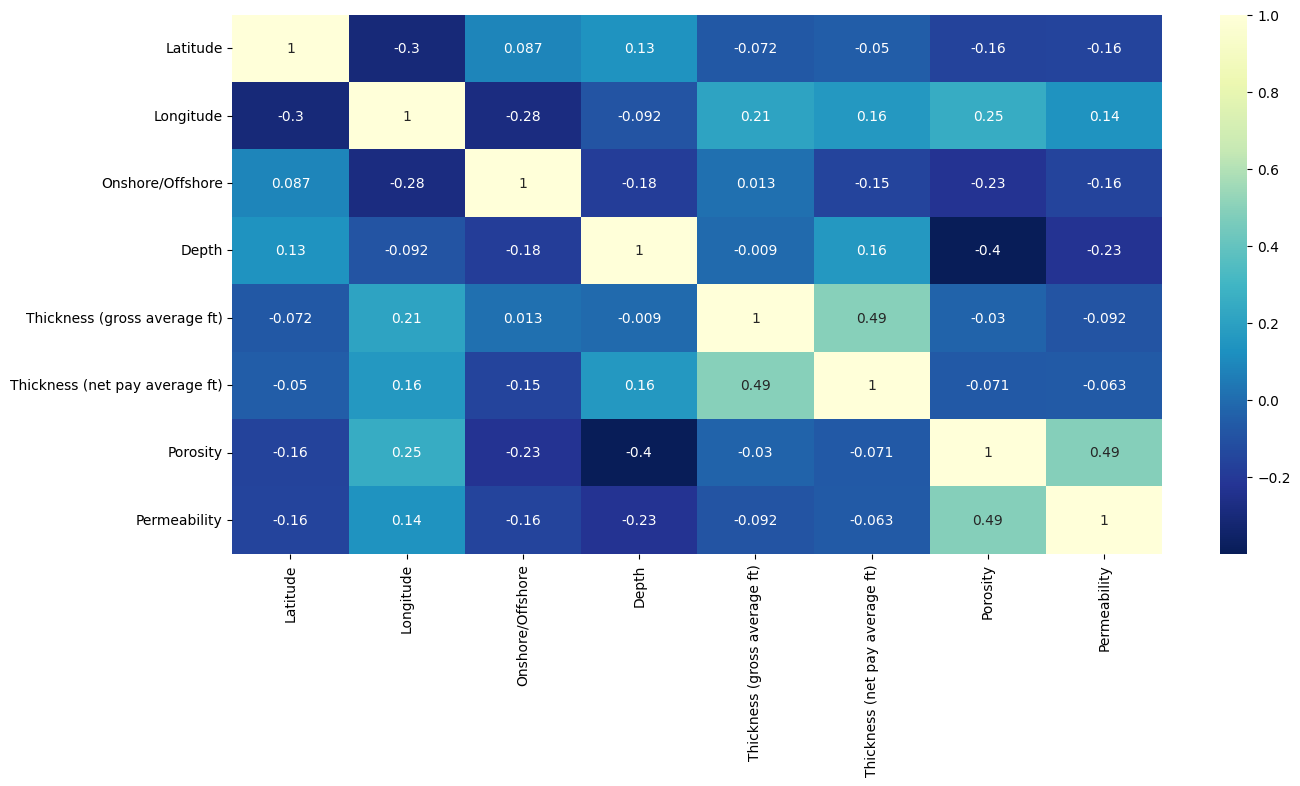

In [23]:
plt.figure(figsize=(15,7))
sns.heatmap(df2.corr(),annot=True,cmap="YlGnBu_r")

In [24]:
y=df2.pop("Onshore/Offshore")
X=df2

In [25]:
df2["Latitude"]=df2["Latitude"].fillna(0)
df2["Longitude"]=df2["Longitude"].fillna(0)

In [26]:
df1["Latitude"].isnull().sum() #13
df1["Longitude"].isnull().sum() #16

0

In [27]:
from sklearn.preprocessing import RobustScaler,StandardScaler

rob=StandardScaler()
df1=rob.fit_transform(df1)
X=rob.fit_transform(X)

In [28]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [29]:
from sklearn.ensemble import RandomForestClassifier

clf = RandomForestClassifier(max_depth=20, random_state=0)
clf.fit(X_train, y_train)
y_pred=clf.predict(X_test)

In [30]:
from sklearn.tree import DecisionTreeClassifier

dTree_clf = DecisionTreeClassifier()

dTree_clf.fit(X_train, y_train)

y_pred=dTree_clf.predict(X_test)

In [31]:
import lightgbm as lgb
clf = lgb.LGBMClassifier()
clf.fit(X_train, y_train)

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000142 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 402
[LightGBM] [Info] Number of data points in the train set: 207, number of used features: 7
[LightGBM] [Info] Start training from score -1.255181
[LightGBM] [Info] Start training from score -0.362905
[LightGBM] [Info] Start training from score -3.946424
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No furt

LGBMClassifier()

In [32]:
from xgboost import XGBClassifier

In [33]:
from sklearn.ensemble import VotingClassifier, RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from sklearn.svm import SVC

# List of classifiers
estimators = []

# Add XGBClassifier
estimators.append(('XGB', XGBClassifier(random_state=200, seed=100)))

# Add DecisionTreeClassifier
estimators.append(('dtc', DecisionTreeClassifier()))

# Add LGBMClassifier
estimators.append(('lgbm', LGBMClassifier()))

# Add SVC (Support Vector Classifier)
estimators.append(('svm', SVC(probability=True)))

# Add RandomForestClassifier
estimators.append(('rf', RandomForestClassifier()))

# Create the VotingClassifier with soft voting
clf = VotingClassifier(estimators=estimators, voting='soft')
clf.fit(X_train, y_train)

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000025 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 402
[LightGBM] [Info] Number of data points in the train set: 207, number of used features: 7
[LightGBM] [Info] Start training from score -1.255181
[LightGBM] [Info] Start training from score -0.362905
[LightGBM] [Info] Start training from score -3.946424
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No furt

VotingClassifier(estimators=[('XGB',
                              XGBClassifier(base_score=None, booster=None,
                                            callbacks=None,
                                            colsample_bylevel=None,
                                            colsample_bynode=None,
                                            colsample_bytree=None, device=None,
                                            early_stopping_rounds=None,
                                            enable_categorical=False,
                                            eval_metric=None,
                                            feature_types=None, gamma=None,
                                            grow_policy=None,
                                            importance_type=None,
                                            interaction_constraints=None,
                                            learning_ra...
                                            max_cat_to_onehot=None,
                                            max_delta_step=None, max_depth=None,
                                            max_leaves=None,
                                            min_child_weight=None, missing=nan,
                                            monotone_constraints=None,
                                            multi_strategy=None,
                                            n_estimators=None, n_jobs=None,
                                            num_parallel_tree=None,
                                            random_state=200, ...)),
                             ('dtc', DecisionTreeClassifier()),
                             ('lgbm', LGBMClassifier()),
                             ('svm', SVC(probability=True)),
                             ('rf', RandomForestClassifier())],
                 voting='soft')

In [34]:
y_pred=clf.predict(X_test)

In [35]:
from sklearn.metrics import confusion_matrix
y_true = list(y_test)
y_pred = y_pred
confusion_matrix(y_true, y_pred)

array([[19,  8,  0],
       [ 5, 69,  0],
       [ 0,  1,  0]])

In [36]:
y_pred=clf.predict(df1)

In [37]:
y_pred

array([0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1,
       1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1,
       0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1])

In [38]:
df=pd.DataFrame({"Onshore/Offshore":y_pred});df.index.name="index"

In [39]:
df["Onshore/Offshore"]=df["Onshore/Offshore"].replace({0:"OFFSHORE",1:"ONSHORE",2:"ONSHORE/OFFSHORE"});df

,Onshore/Offshore
index,
0,OFFSHORE
1,OFFSHORE
2,ONSHORE
3,OFFSHORE
4,ONSHORE
...,...
128,ONSHORE
129,ONSHORE
130,ONSHORE
